# Qualico 2023

In [44]:
import dhlab as dh
import pandas as pd
import os
import json
import dhlab.graph_networkx_louvain as gnl
import networkx as nx
from collections import Counter
from IPython.display import Markdown

dh.css()

In [2]:
files = !ls json2

In [3]:
filelist = [os.path.join("json2", f) for f in files if "_en" in f]
filelist

['json2/cze_results2_en.json',
 'json2/de_results2_en.json',
 'json2/fi_results2_en.json',
 'json2/no_results2_en.json',
 'json2/pl_results2_en.json']

In [4]:
topics = {}
for f in filelist:
    lang = f.split('/')[1].split('.json')[0].split('_')[0]
    with open(f) as fp:
        topics[lang] = json.load(fp)
    

In [5]:
topic_lang = {}
for lang in topics:
    for top in topics[lang]:
        topic_lang[f"{lang}_{top}"] = topics[lang][top]

In [6]:
dfs = []
for tl in topic_lang:
    df = pd.DataFrame(topic_lang[tl])
    df[tl] = 1
    dfs.append(df)

In [7]:
dtm = pd.concat([df.drop_duplicates().set_index(0) for df in dfs], axis = 1).fillna(0)

In [8]:
d = dtm.copy()

In [9]:
d.columns = [x[:7] for x in d.columns]

In [10]:
d['sums'] = d.sum(axis = 1)

In [11]:
from random import sample


In [12]:
sample(list(d.columns[:-1]),10)

['no_comp',
 'pl_trav',
 'de_Hist',
 'no_trav',
 'fi_trav',
 'de_reli',
 'fi_slav',
 'no_math',
 'de_trip',
 'no_slav']

In [47]:
d[['sums'] + sample(list(d.columns[:-1]),15)].sample(20).style.format(precision=0).background_gradient()

,sums,cze_sla,no_mora,fi_meta,de_meta,de_Hist,fi_lite,pl_meta,pl_spec,pl_slav,no_spec,fi_hist,de_lite,cze_mat,no_meta,no_trav
0,,,,,,,,,,,,,,,,
european,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ghana,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
use,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
europa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
future,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
draft,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
years,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
lie,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
find,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
words = dtm.sum(axis = 1).sort_values(ascending = False)

In [15]:
words[words > 10]

0
world            21.0
life             18.0
philosophy       17.0
book             16.0
science          16.0
man              15.0
work             15.0
word             14.0
human            12.0
culture          12.0
history          11.0
study            11.0
philosophical    11.0
of               11.0
year             11.0
dtype: float64

In [28]:
small_dtm = dtm.loc[words[words > 1].index]

In [29]:
adj = small_dtm.transpose().dot(small_dtm)

In [30]:
adj.sort_values(by='cze_history', ascending=False).style.format(precision=0).background_gradient()

,cze_religion,cze_mathematics,cze_history,cze_travel,cze_literature of languages,cze_computer science,cze_metaphysics,cze_moral philosophy,cze_special metaphysics,cze_slavers,de_literature of languages,de_mathematics,de_History,de_trip,de_computer science,de_religion,de_special metaphysics,de_metaphysics,de_moral philosophy,de_slavery,fi_metaphysics,fi_computer science,fi_moral philosophy,fi_mathematics,fi_religion,fi_history,fi_travel,fi_slavery,fi_special metaphysics,fi_literature of languages,no_literature of languages,no_history,no_computer science,no_moral philosophy,no_mathematics,no_religion,no_travel,no_special metaphysics,no_slavery,no_metaphysics,pl_history,pl_literature of languages,pl_moral philosophy,pl_computer science,pl_mathematics,pl_religion,pl_travel,pl_metaphysics,pl_special metaphysics,pl_slavers
cze_history,5,5,63,6,10,1,1,2,3,5,6,2,24,3,2,6,0,0,0,5,2,2,2,3,4,12,0,3,0,0,3,10,0,3,1,1,1,1,2,2,30,6,3,0,3,3,3,1,3,6
pl_history,6,4,30,6,7,3,1,6,4,3,7,1,21,4,2,5,1,0,2,5,3,3,4,1,6,12,0,3,0,0,6,11,0,4,0,4,3,2,5,1,61,11,7,2,4,14,3,2,6,6
de_History,8,5,24,3,6,2,2,1,2,4,13,4,58,5,2,8,5,0,1,5,3,4,1,2,8,11,0,1,0,0,2,10,2,7,0,6,0,2,5,4,21,4,3,0,4,9,2,4,6,4
fi_history,7,9,12,4,5,0,2,4,4,1,6,3,11,5,2,2,2,0,0,2,5,1,6,11,4,45,1,1,0,0,3,9,1,2,3,2,4,0,3,2,12,7,4,1,6,5,4,2,3,2
cze_literature of languages,10,3,10,7,66,2,1,10,4,3,29,0,6,3,1,6,2,0,2,2,2,3,15,1,3,5,1,2,0,0,31,5,2,4,0,1,2,1,2,3,7,38,3,2,1,7,4,2,3,1
no_history,4,2,10,5,5,1,1,3,3,1,3,1,10,5,1,3,1,0,0,5,0,0,2,0,2,9,1,2,0,0,3,33,2,3,0,5,4,1,3,3,11,3,3,0,1,4,4,2,2,1
de_literature of languages,17,3,6,6,29,2,3,12,7,3,59,2,13,5,3,10,3,0,1,3,5,3,16,3,5,6,2,2,0,0,33,3,1,3,0,1,2,2,1,5,7,28,2,1,1,7,5,5,6,5
pl_literature of languages,15,5,6,8,38,3,0,14,7,5,28,0,4,5,1,9,2,0,2,3,6,4,17,1,4,7,1,0,0,0,26,3,1,2,0,2,4,2,2,2,11,70,6,3,1,14,5,2,5,3
de_religion,31,3,6,3,6,3,2,17,10,0,10,3,8,2,4,52,9,3,1,5,8,5,12,5,4,2,0,0,0,0,8,3,1,4,0,10,1,5,0,10,5,9,3,1,1,17,1,6,11,4
pl_slavers,3,0,6,2,1,0,2,2,2,9,5,0,4,4,0,4,3,2,0,7,4,0,3,0,0,2,0,1,0,0,3,1,0,1,1,0,1,3,9,1,6,3,2,0,2,3,4,4,6,40


In [31]:
G = nx.from_pandas_adjacency(adj)

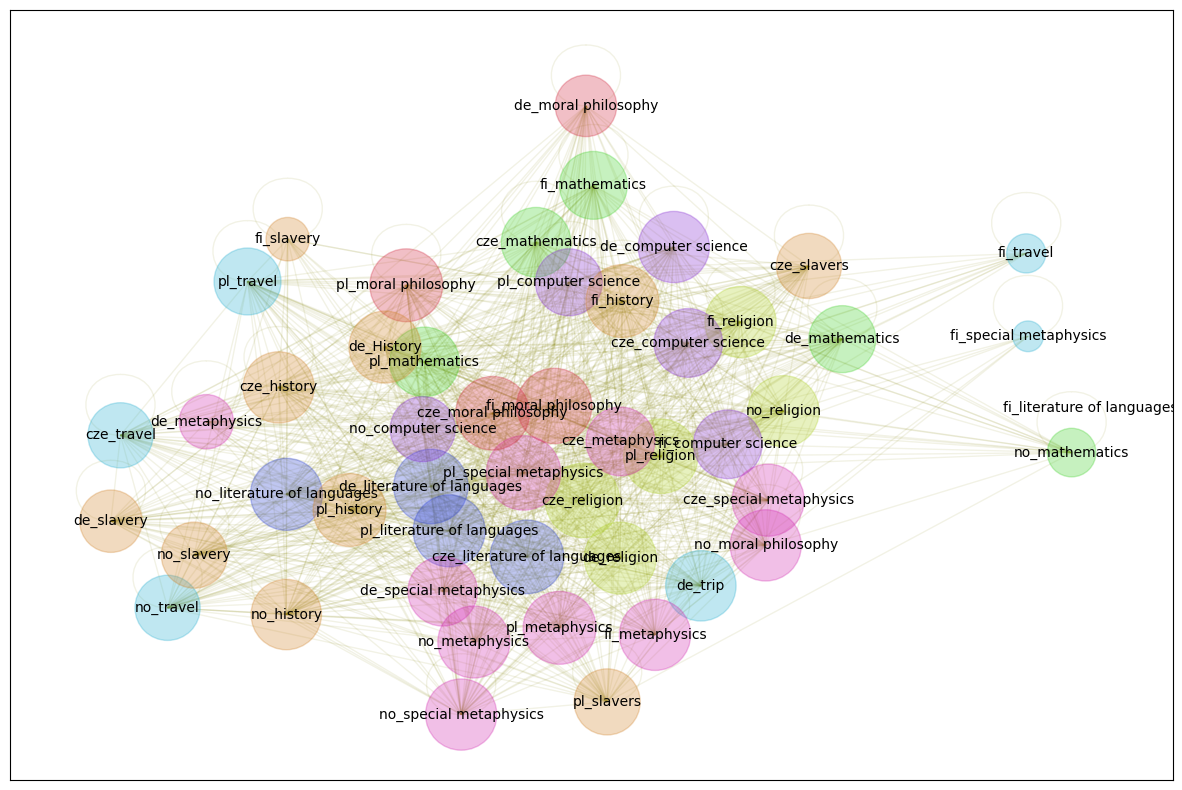

In [32]:
gnl.show_graph(G, spread = 3.5)

In [33]:
gnl.show_communities(G)

cze_religion-pl_religion :  cze_religion, pl_religion, de_religion, no_religion, fi_religion

cze_mathematics-pl_mathematics :  cze_mathematics, pl_mathematics, fi_mathematics, de_mathematics, no_mathematics

 :  

de_trip-pl_travel :  de_trip, pl_travel, no_travel, cze_travel, fi_travel, fi_special metaphysics

de_literature of languages-cze_literature of languages :  de_literature of languages, cze_literature of languages, pl_literature of languages, no_literature of languages

de_computer science-cze_computer science :  de_computer science, cze_computer science, fi_computer science, pl_computer science, no_computer science

pl_special metaphysics-pl_metaphysics :  pl_special metaphysics, pl_metaphysics, cze_special metaphysics, no_metaphysics, fi_metaphysics, no_special metaphysics, no_moral philosophy, de_special metaphysics, cze_metaphysics, de_metaphysics

fi_moral philosophy-cze_moral philosophy :  fi_moral philosophy, cze_moral philosophy, pl_moral philosophy, de_moral philosop

In [39]:
Counter(nx.betweenness_centrality(G)).most_common(10)

[('de_trip', 0.009860504487525817),
 ('fi_moral philosophy', 0.009780100126994868),
 ('no_travel', 0.009622962857071968),
 ('cze_special metaphysics', 0.0095394148359168),
 ('fi_metaphysics', 0.009441918427478865),
 ('fi_history', 0.008902953667325195),
 ('de_literature of languages', 0.008479642562986401),
 ('fi_computer science', 0.008456698193771237),
 ('cze_literature of languages', 0.007969974745457938),
 ('fi_religion', 0.007802955498035594)]

In [42]:
pd.DataFrame(Counter(nx.degree_centrality(G)).most_common(10), columns=['Country_topic', 'value'])

,Country_topic,value
0,fi_moral philosophy,0.979592
1,cze_religion,0.959184
2,de_literature of languages,0.959184
3,pl_religion,0.959184
4,pl_special metaphysics,0.959184
5,cze_literature of languages,0.938776
6,cze_moral philosophy,0.938776
7,fi_history,0.918367
8,pl_history,0.918367
9,pl_moral philosophy,0.918367


In [43]:
pd.DataFrame(Counter(nx.betweenness_centrality(G)).most_common(10), columns=['Country_topic', 'value'])

,Country_topic,value
0,de_trip,0.009861
1,fi_moral philosophy,0.009780
2,no_travel,0.009623
3,cze_special metaphysics,0.009539
4,fi_metaphysics,0.009442
5,fi_history,0.008903
6,de_literature of languages,0.008480
7,fi_computer science,0.008457
8,cze_literature of languages,0.007970
9,fi_religion,0.007803


In [ ]:
def community(comdict):
    for i, x in enumerate(comdict):
        
        

In [48]:
wadj = small_dtm.dot(small_dtm.transpose())

In [56]:
wadj[wadj.columns[:10]]

,world,life,philosophy,book,science,man,work,word,human,culture
0,,,,,,,,,,
world,21.0,14.0,9.0,11.0,7.0,12.0,7.0,8.0,8.0,7.0
life,14.0,18.0,9.0,10.0,6.0,12.0,7.0,8.0,6.0,6.0
philosophy,9.0,9.0,17.0,7.0,10.0,9.0,7.0,4.0,10.0,4.0
book,11.0,10.0,7.0,16.0,5.0,10.0,7.0,9.0,5.0,6.0
science,7.0,6.0,10.0,5.0,16.0,5.0,7.0,3.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...
post,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
order,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,1.0
sect,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0


In [57]:
wadj[wadj.columns[:10]].sort_values(by=['philosophy', 'life','world','science'], ascending=False).head(20).style.format(precision=0).background_gradient()

0,world,life,philosophy,book,science,man,work,word,human,culture
0,,,,,,,,,,
philosophy,9,9,17,7,10,9,7,4,10,4
human,8,6,10,5,9,6,4,3,12,4
science,7,6,10,5,16,5,7,3,9,6
philosophical,4,4,10,1,7,3,3,1,7,2
life,14,18,9,10,6,12,7,8,6,6
world,21,14,9,11,7,12,7,8,8,7
man,12,12,9,10,5,15,7,8,6,5
spiritual,6,7,8,5,4,6,4,3,5,4
book,11,10,7,16,5,10,7,9,5,6


In [58]:
W = nx.from_pandas_adjacency(wadj)

In [60]:
pd.DataFrame(Counter(nx.degree_centrality(W)).most_common(20), columns=['Topicword', 'value'])

,Topicword,value
0,world,0.730655
1,work,0.699405
2,science,0.675595
3,life,0.672619
4,book,0.659226
5,word,0.614583
6,man,0.607143
7,culture,0.604167
8,of,0.599702
9,study,0.569940


In [62]:
#pd.DataFrame(Counter(nx.betweenness_centrality(W)).most_common(20), columns=['Topicword', 'value'])

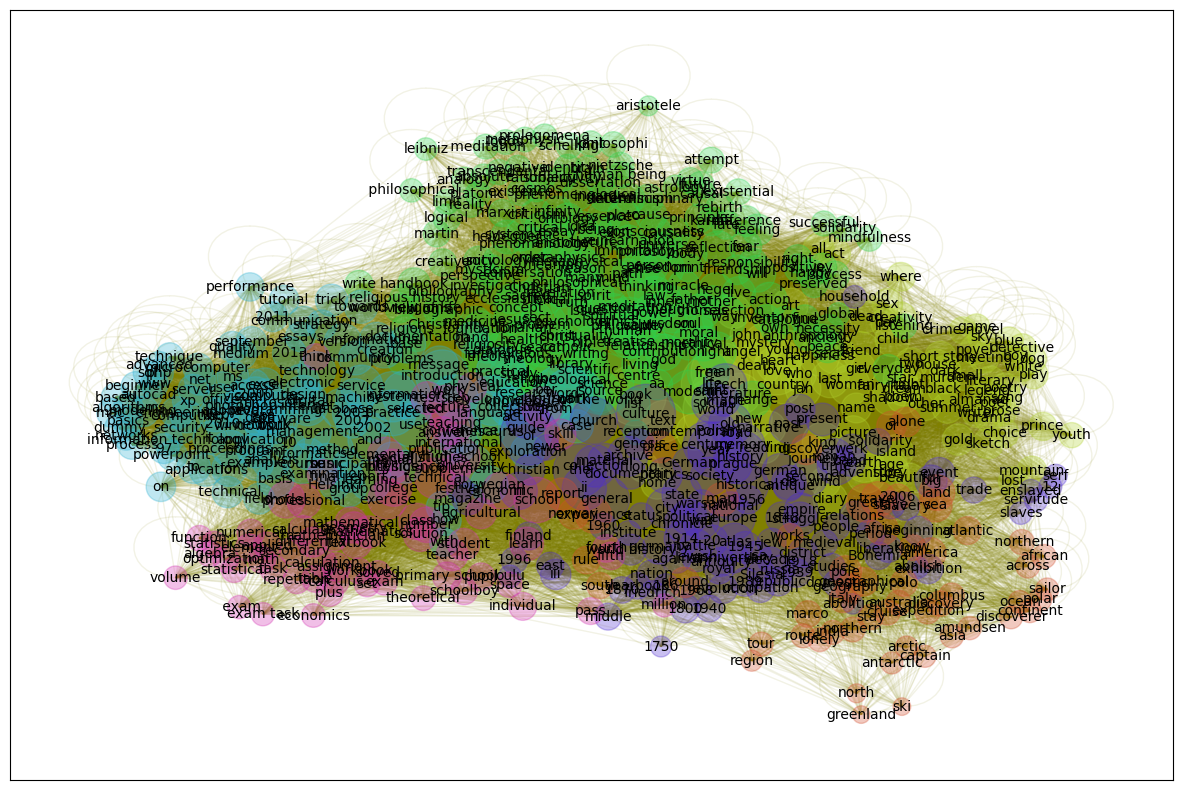

In [63]:
gnl.show_graph(W)

In [76]:
Ws = nx.from_edgelist([x for x in W.edges(data=True) if x[2]['weight']>2])

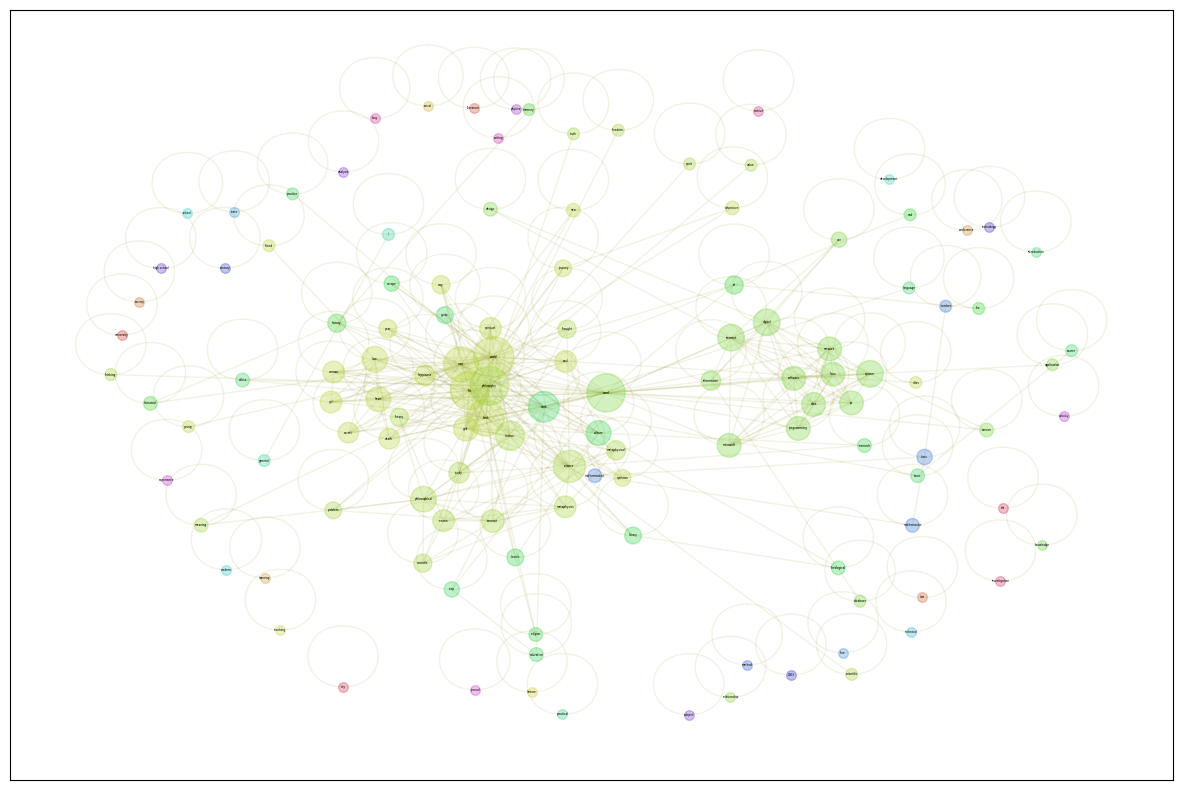

In [74]:
gnl.show_graph(Ws, fontsize=2, spread=1)

In [77]:
gnl.show_communities(Ws)

east :  east

base :  base

work-education :  work, education, economic, college, example, machine, health, agricultural, art, collective

word-system :  word, system, information, guide, internet, digital, programming, network, microsoft, software, pc, linux, data, use, basic, application, computer, java, access, excel, visual, introduction, adobe, practice, web, 2010, office, technology, 2000, photoshop, windows, 2003, design, database, course, electronic, step, service, language, analysis, program, version, user, ms, manual, net, server, proceedings, xp, management, computing, engineering, security, practical, it, conference, applications, to, community, message, lecture, 2013, learn, professional

culture-god :  culture, god, spiritual, church, library, religion, research, religious, theology, theological, scientific, development, bible, christ, spirituality, catholic, faith, psychology, dialogue, religiosity, activity, search, source, knowledge, reincarnation, material, university